In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

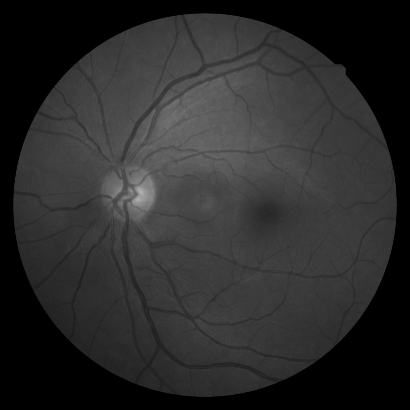

In [125]:
retina = cv2.imread('retina.jpg', 0)
rows, cols = retina.shape
# Scale factor
scale = 0.4
# Scaled image
retina = cv2.resize(retina, (round(scale * cols), round(scale * rows)))
cv2_imshow(retina)

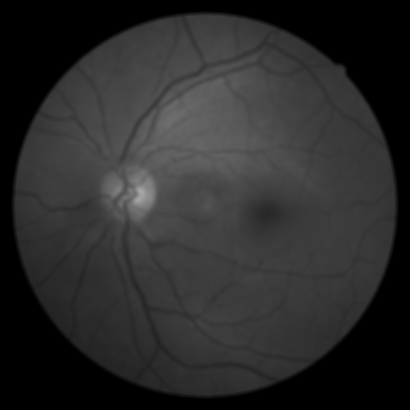

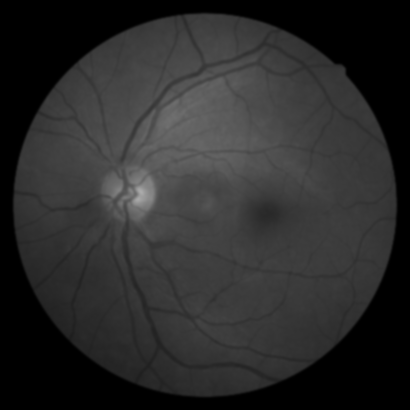

In [126]:
#Blur ->  Borramento da imagem utilizando efeito de média, devido a isso, esse 
#        filtro é interessante para retocar partes de uma imagem.
#         
retinaBlur = cv2.blur(retina,(5,5))
retinaGauss = cv2.GaussianBlur(retina,(5,5),0)

cv2_imshow(retinaBlur)
cv2_imshow(retinaGauss)

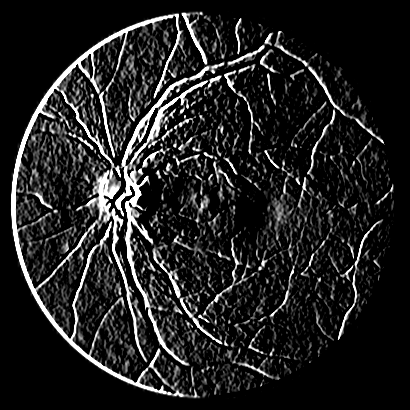

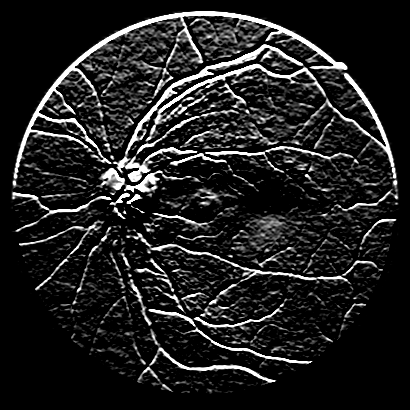

In [127]:
# -> Importante para pegar as derivadas das imagens, dessa forma, 
#    esse filtro tem grandes aplicações na detecção de bordas.
sobelx = cv2.Sobel(retina,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(retina,cv2.CV_64F,0,1,ksize=5)

cv2_imshow(sobelx)
cv2_imshow(sobely)


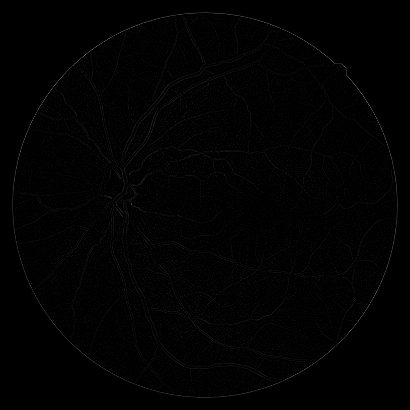

In [128]:
#Laplacian -> Assim como o filtro sobel, o laplaciano também trabalha com 
#             derivadas e é utilizado para detecção de bordas, uma vez que
#             ele é senvível a grandes variações de intensidade na imagem, 
#             característica que também o torna bastante sensível à ruidos.
laplacian = cv2.Laplacian(retina,5)
cv2_imshow(laplacian)

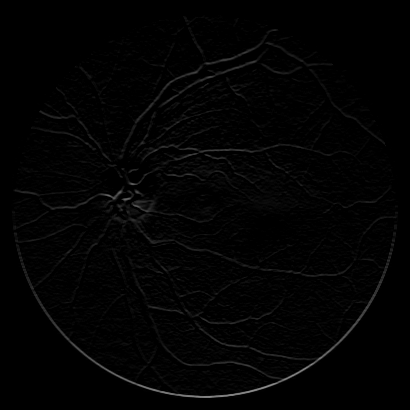

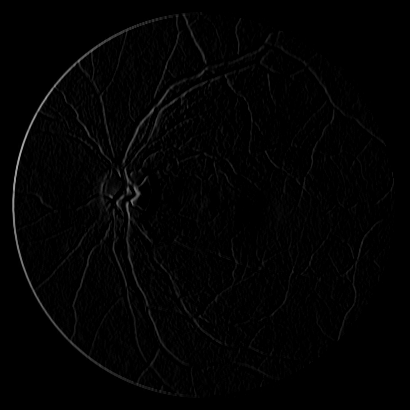

In [129]:
#Prewitt 
preWx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
preWy = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
retinaPrewittx = cv2.filter2D(retina, -1, preWx)
retinaPrewitty = cv2.filter2D(retina, -1, preWy)

cv2_imshow(retinaPrewittx)
cv2_imshow(retinaPrewitty)

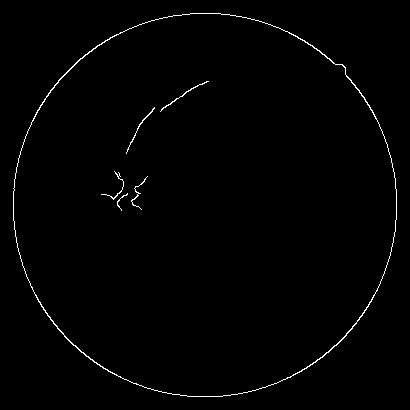

In [130]:
#Canny
retinaCanny = cv2.Canny(retina,100,200)

cv2_imshow(retinaCanny)

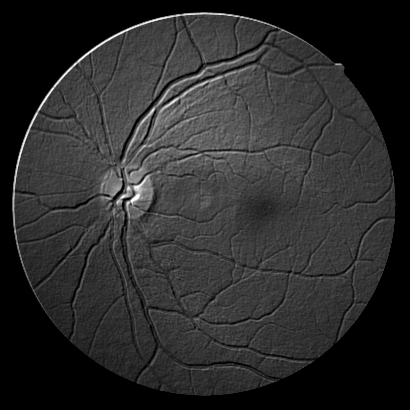

In [131]:
#Emboss
emboss = np.array(([-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]), dtype="int")

retinaEmboss = cv2.filter2D(retina, -1, emboss)
cv2_imshow(retinaEmboss)

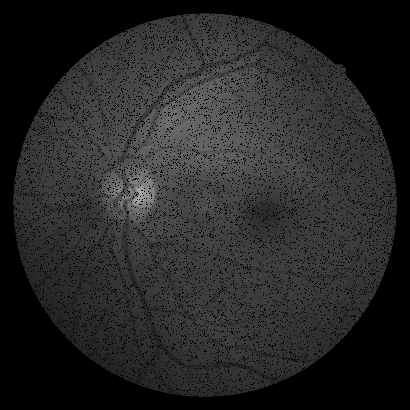

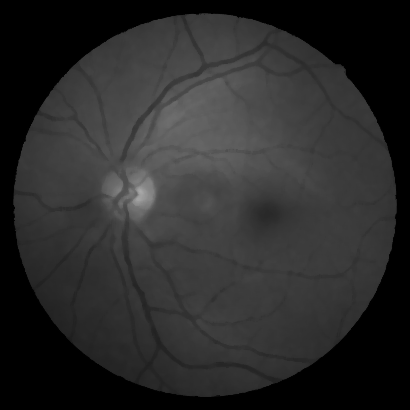

In [151]:
#Inserindo e removendo ruídos -> O ruído sal e pimenta traz a modificação dos
#pixels da imagem, tornando-os, aleatóriamente, o pixel preto ou branco. Daí 
#nome do filtro. Para contornar esse problemas, precisamos utilizar um filtro de 
#borramento na imagem; o da mediana é um bom indicado para esse caso, uma vez
#ele irá preservar as bordas dos pixels e utilizalas para preencher o pixel 
#central, removendo o efeito do ruído.
def noisy(image):
    row,col = image.shape
    s_vs_p = 0.3
    amount = 0.1
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
    out[coords] = 0
    return out
noisyRetina = noisy(retina)
wOutNoisy = cv2.medianBlur(noisyRetina,5)
cv2_imshow(noisyRetina)
cv2_imshow(wOutNoisy)